# Artificial Neural Networks and Deep Learning

---

## Homework 1: Minimal Working Example

To make your first submission, follow these steps:
1. Create a folder named `[2024-2025] AN2DL/Homework 1` in your Google Drive.
2. Upload the `training_set.npz` file to this folder.
3. Upload the Jupyter notebook `Homework 1 - Minimal Working Example.ipynb`.
4. Load and process the data.
5. Implement and train your model.
6. Submit the generated `.zip` file to Codabench.


## 🌐 Connect Colab to Google Drive

In [2]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive/My Drive/Colab Notebooks/[2024-2025] AN2DL/Challenge1

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Colab Notebooks/[2024-2025] AN2DL/Challenge1


## ⚙️ Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from sklearn.decomposition import PCA
from scipy.spatial import distance
from sklearn.manifold import TSNE

seed = 17
np.random.seed(17)
tf.random.set_seed(17);

## ⏳ Load the Data

In [3]:
# Load dataset
data = np.load('training_set.npz')
X = data['images']
y = data['labels']

Percentage of variance explained by the principal components: [0.3872155  0.10911385]


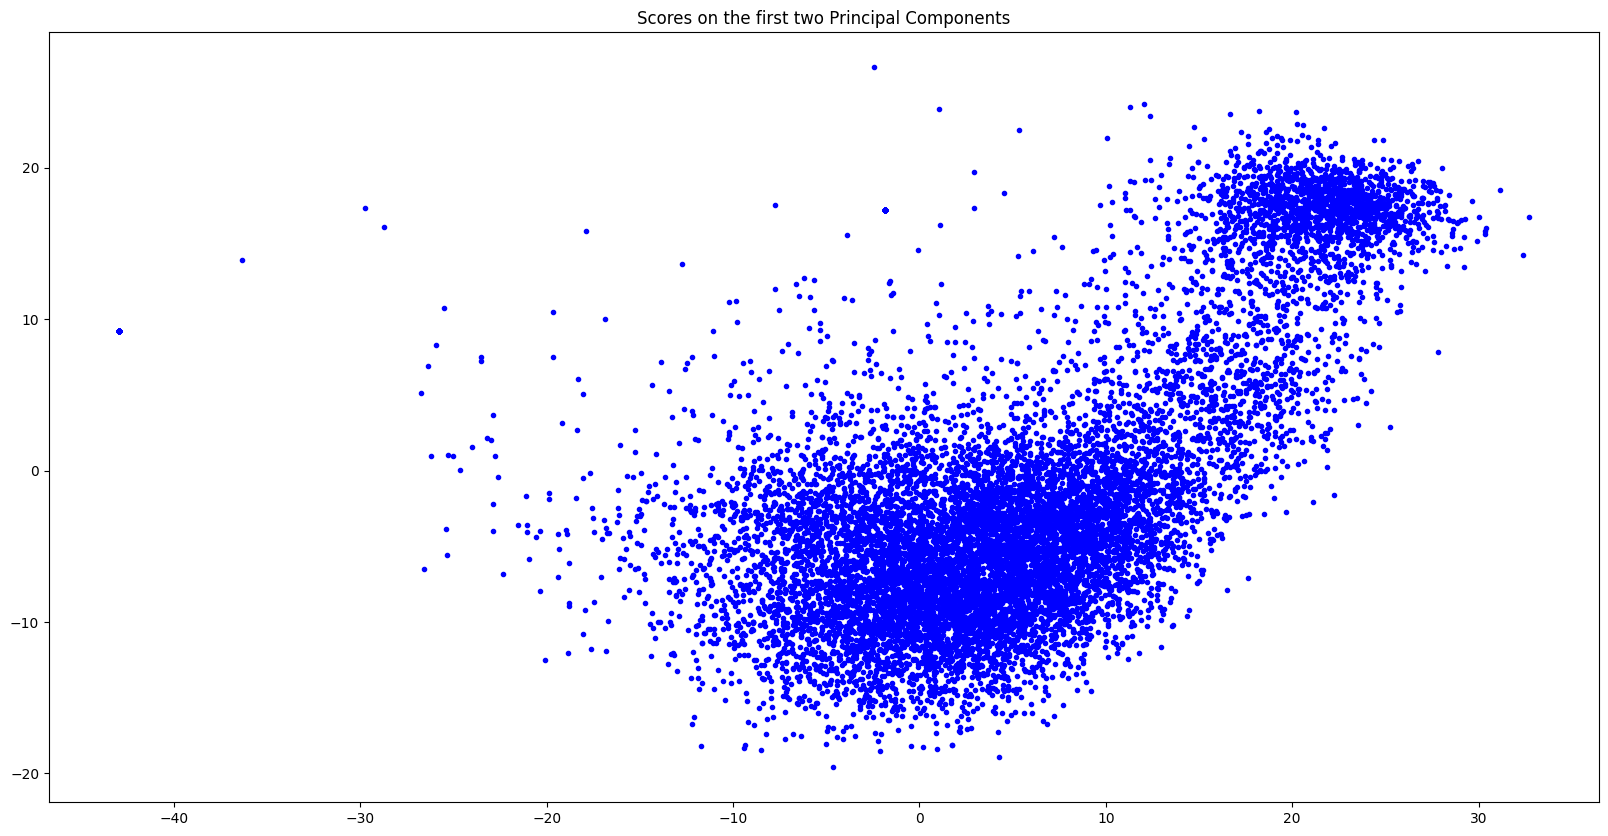

In [4]:
# Normalization for PCA
X = X/255

images_flat = X.reshape((X.shape[0],3*96*96))

# Apply PCA
pca = PCA(n_components=2)
pca.fit(images_flat)
print("Percentage of variance explained by the principal components:",pca.explained_variance_ratio_)
scores = pca.transform(images_flat)

# Plot
plt.figure(figsize=[20,10])
plt.title('Scores on the first two Principal Components')
plt.plot(scores[:,0],scores[:,1], 'b.')
plt.show()


In [5]:
# Compute mahalanobis distance to find outliers
mahalanobis_distances = [distance.mahalanobis(x, np.mean(scores,axis=0), np.linalg.inv(np.cov(scores.T))) for x in scores]

# Get 0.1% furthest images
percentiles = np.percentile(mahalanobis_distances, 99.9)
outliers = np.where(mahalanobis_distances > percentiles)[0]

uniques = np.unique(X[outliers],axis=0)

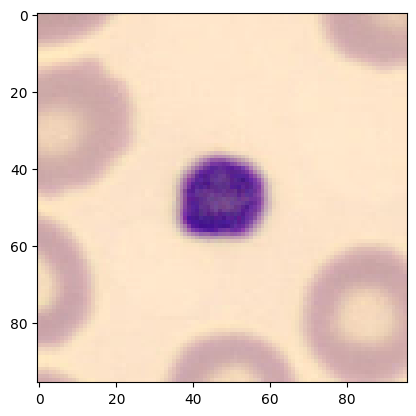

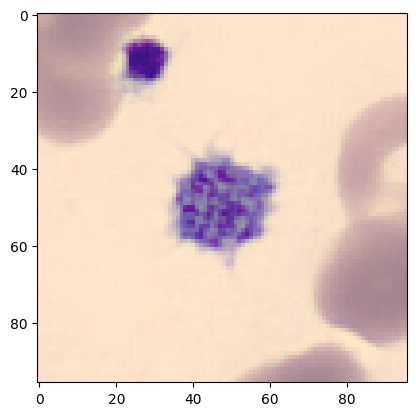

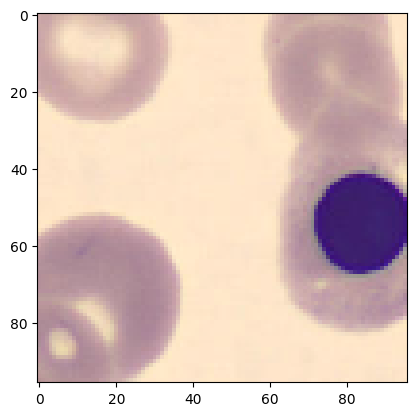

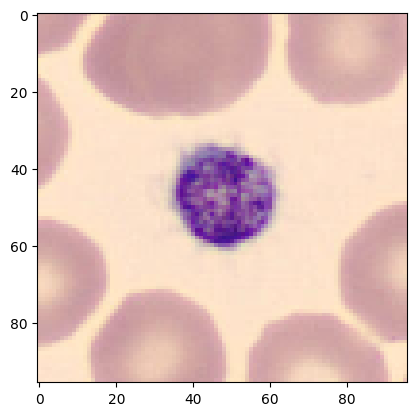

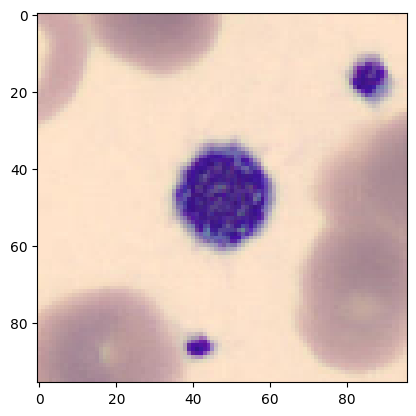

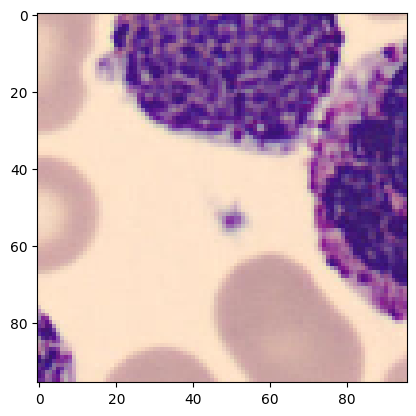

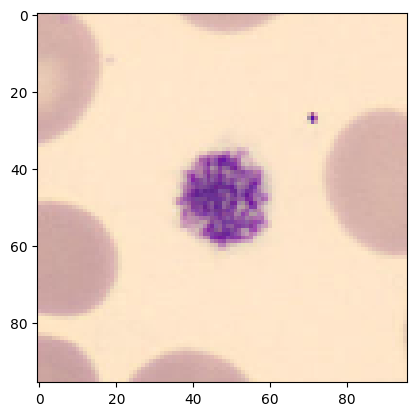

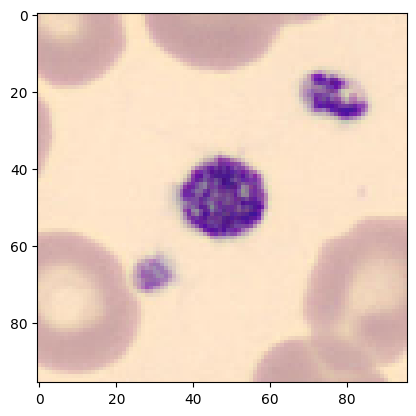

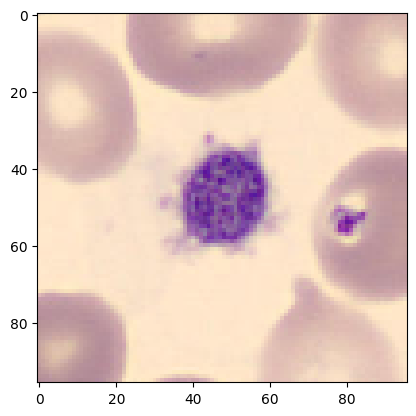

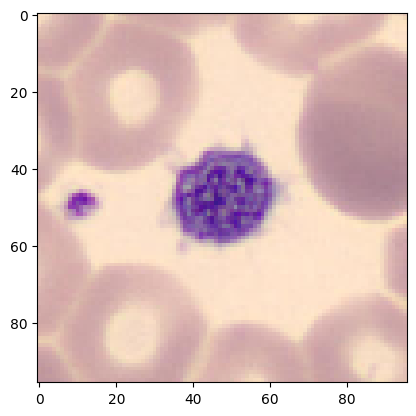

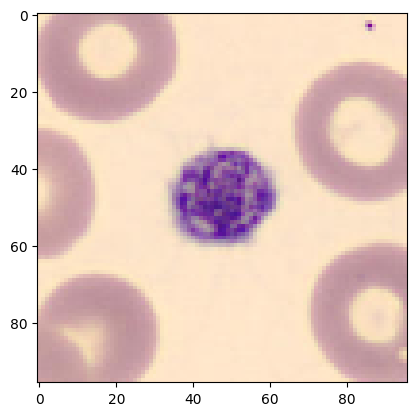

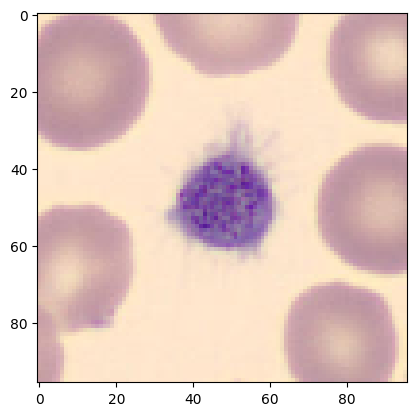

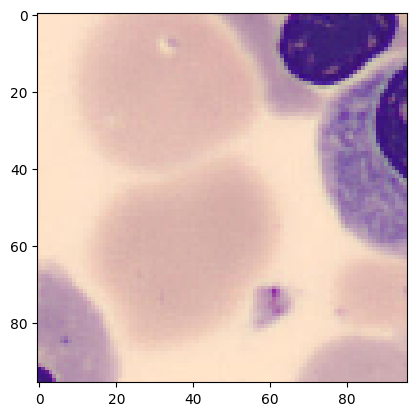

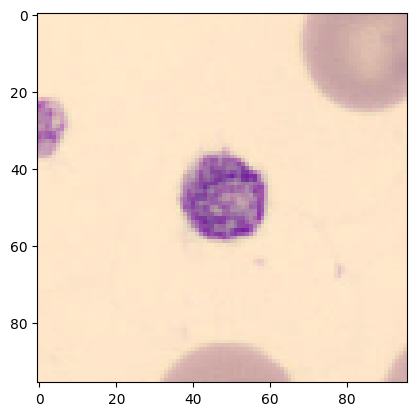

In [6]:
#Plot outliers
for i in range(len(uniques)):
    plt.figure()
    plt.imshow(uniques[i])
plt.show()

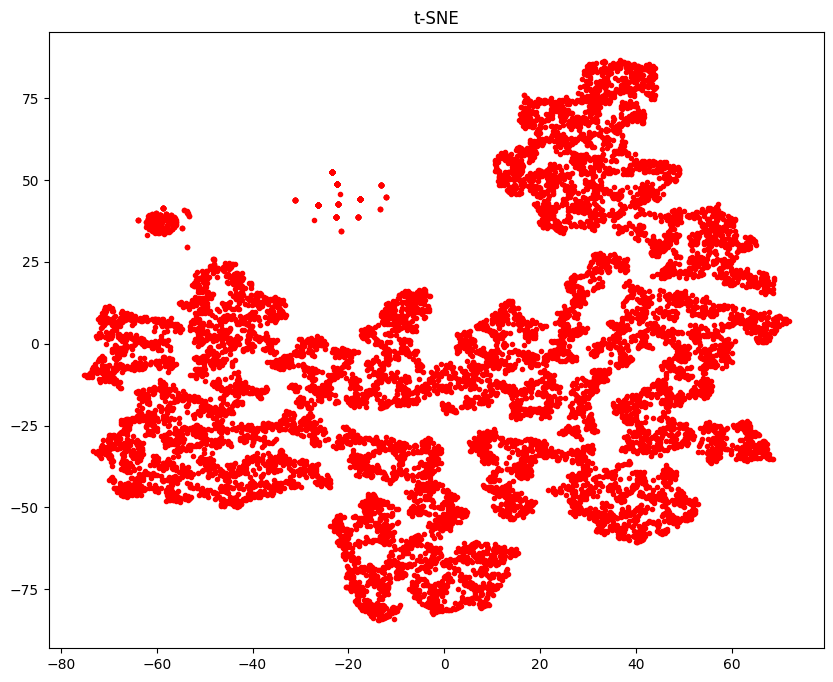

In [9]:
# t-SNE
scores_tsne = TSNE(n_components=2,perplexity=60).fit_transform(scores)

# Plot
plt.figure(figsize=[10,8])
plt.title('t-SNE')
plt.plot(scores_tsne[:,0],scores_tsne[:,1], 'r.')
plt.show()

In [10]:
def printSNE(img, idx, count, outliersIdx):
  for i in range(len(img)):
    plt.figure()
    plt.imshow(img[i])
    plt.title('index: ' + str(outliersIdx[idx[i]]) + ' count: ' + str(count[i]))
  plt.show()

def outlierstSNE(xmin, xmax, ymin, ymax):
  outliersTsne = np.where((scores_tsne[:,1]<(ymax)) & (scores_tsne[:,1]>ymin) & (scores_tsne[:,0]> xmin) & (scores_tsne[:,0] < xmax))[0]
  uniTsne, idxTsne, countTsne = np.unique(X[outliersTsne],axis=0,return_counts = True, return_index = True)
  printSNE(uniTsne, idxTsne, countTsne, outliersTsne)

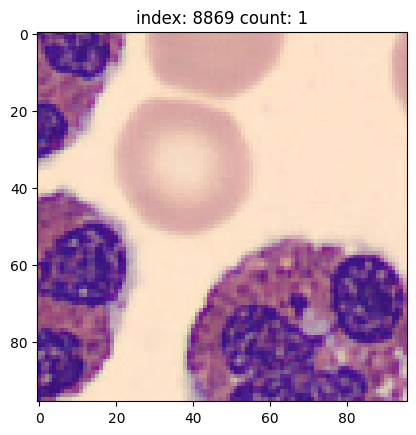

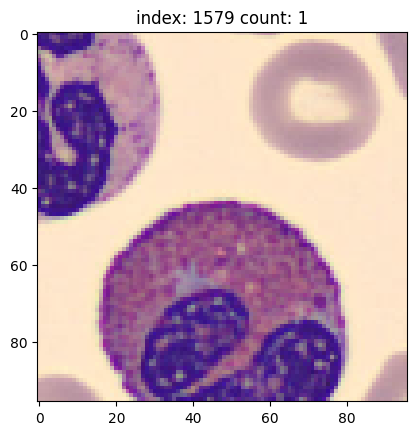

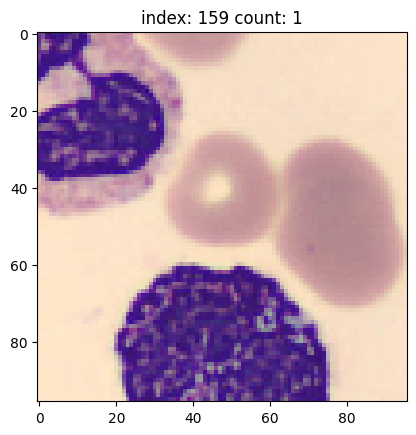

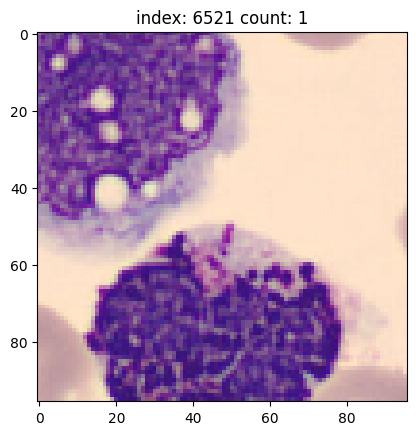

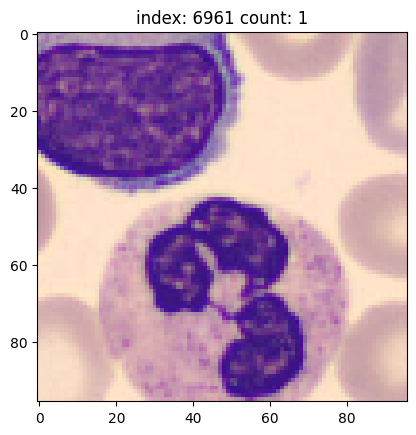

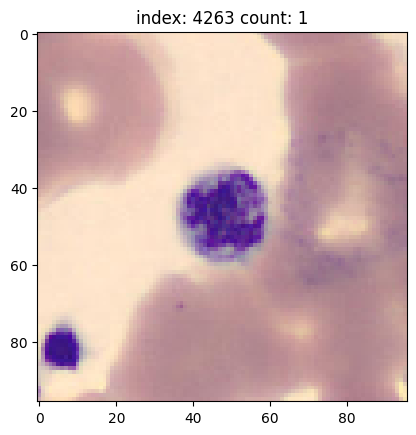

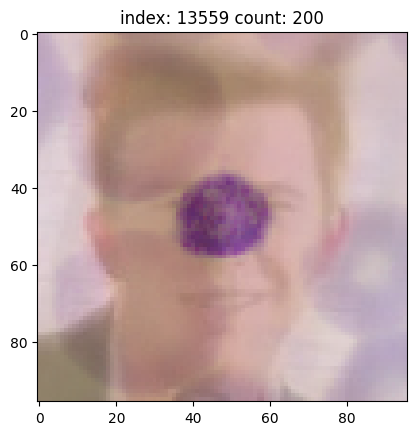

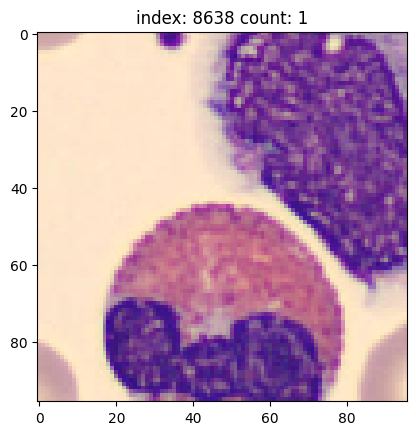

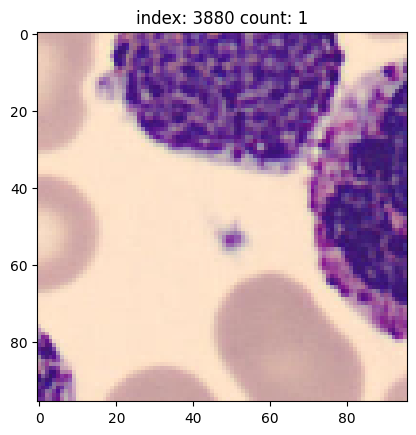

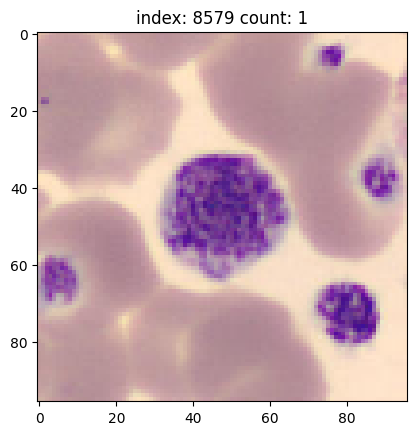

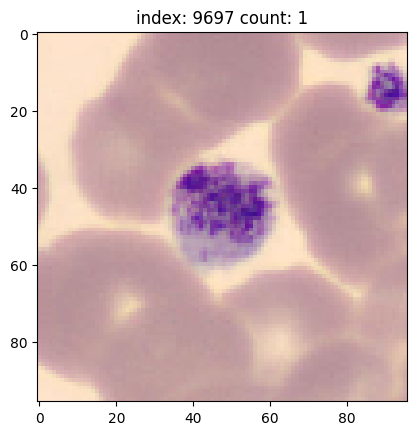

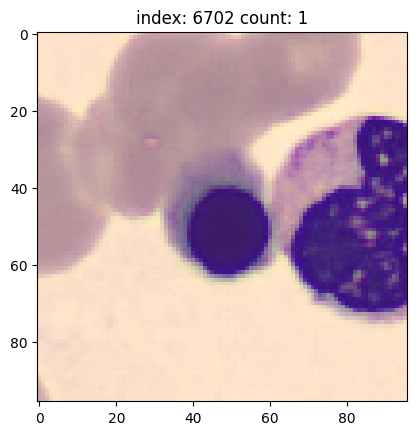

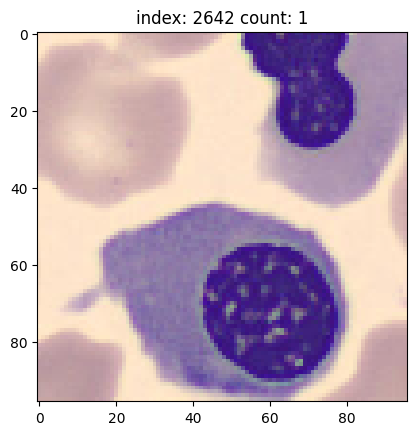

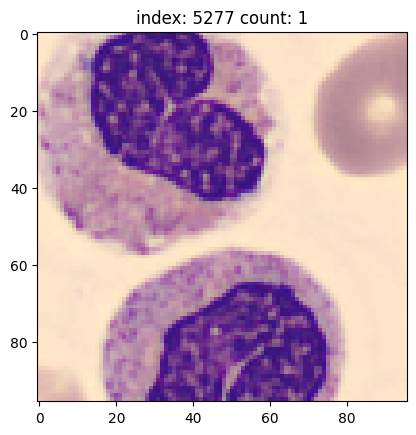

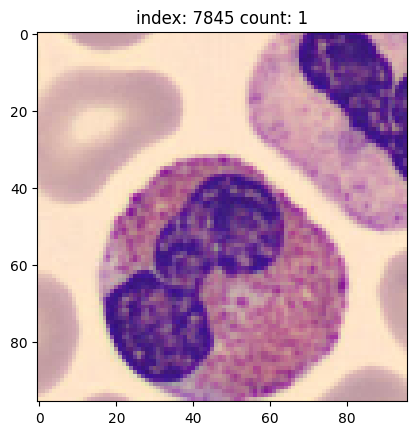

In [11]:
outlierstSNE(-70, -40, 25, 50)

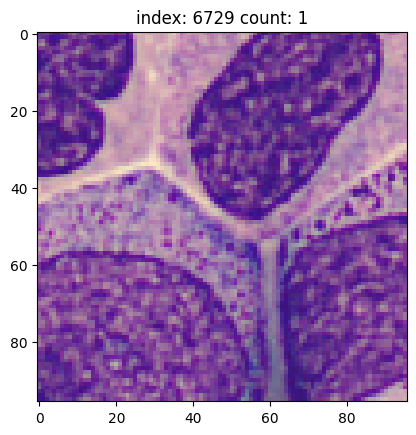

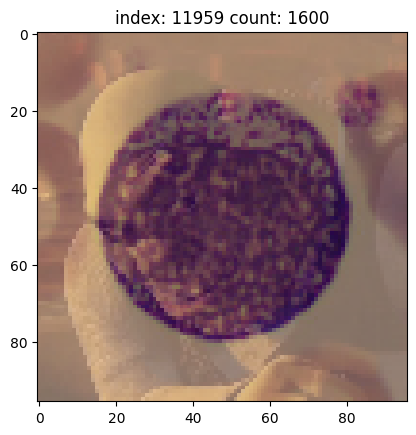

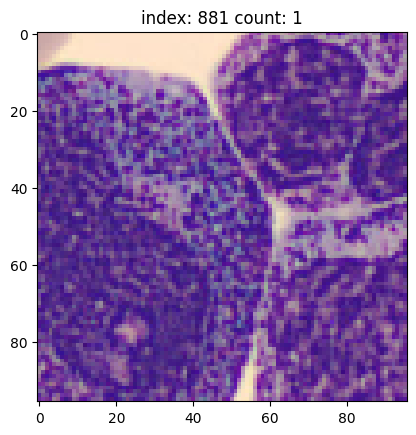

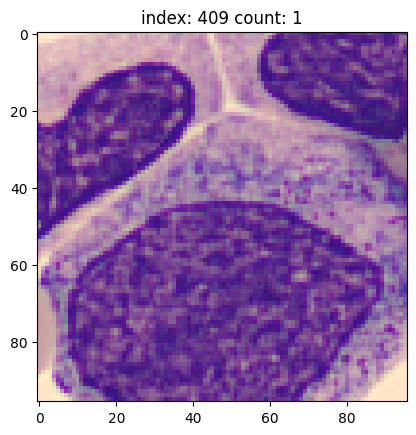

In [12]:
outlierstSNE(-40, 0, 25, 60)

In [4]:
# define outliers
shreck = X[11959]
rick = X[13559]

# Remove duplicates
UniqueX, UniqueIdx = np.unique(X, axis=0, return_index=True)
Xdirty = UniqueX
ydirty = y[UniqueIdx]

# remove outliers
idxRemove = []
for i, img in enumerate(Xdirty):
  if np.array_equal(img, shreck) or np.array_equal(img, rick):
    idxRemove.append(i)

X = np.delete(Xdirty, idxRemove, axis = 0)
y = np.delete(ydirty, idxRemove, axis = 0)